<a href="https://colab.research.google.com/github/bhparmar/3170308/blob/main/Bit_Plane_slicing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from skimage.io import imread
from skimage.color import rgb2lab, lab2rgb
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt 
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read the image in greyscale
#img = cv2.imread('images/note.png', 0)

def read_file(filename):
  img = cv2.imread(filename, 0)
  cv2_imshow(img)
  return img

Saving 100RS_note.jpg to 100RS_note.jpg


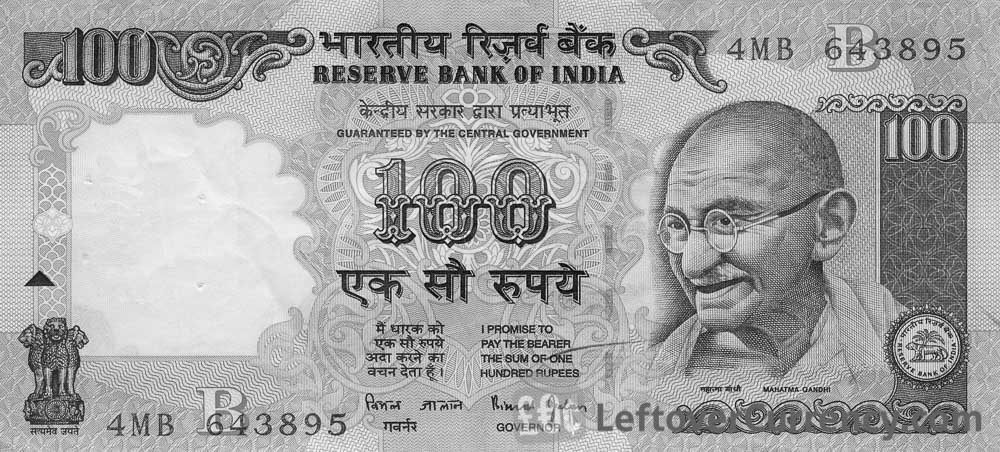

In [4]:
uploaded = files.upload()

filename = next(iter(uploaded))
img= read_file(filename)

In [5]:
#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits

# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])

#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])

# Vertically concatenate
final = cv2.hconcat([finalr,finalv])

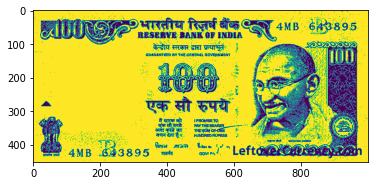

In [6]:
# Display the images
plt.imshow(eight_bit_img) 
plt.show()

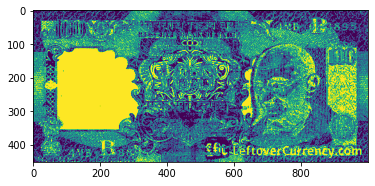

In [7]:
# Display the images
plt.imshow(seven_bit_img) 
plt.show()

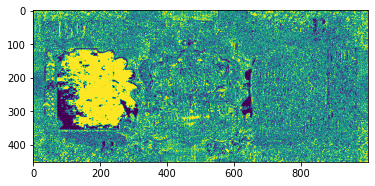

In [8]:
# Display the images
plt.imshow(six_bit_img) 
plt.show()

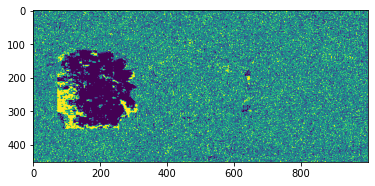

In [9]:
# Display the images
plt.imshow(five_bit_img) 
plt.show()

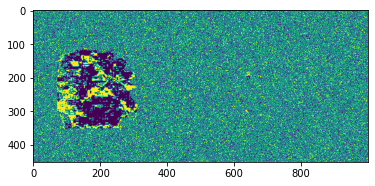

In [10]:
# Display the images
plt.imshow(four_bit_img) 
plt.show()

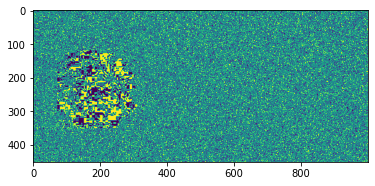

In [11]:
# Display the images
plt.imshow(three_bit_img) 
plt.show()

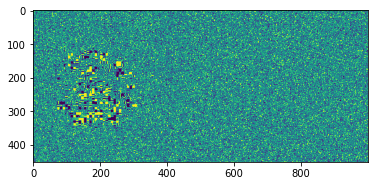

In [12]:
# Display the images
plt.imshow(two_bit_img) 
plt.show()

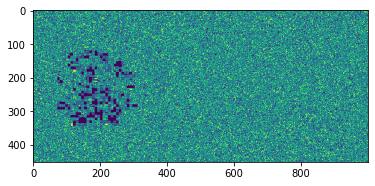

In [13]:
# Display the images
plt.imshow(one_bit_img) 
plt.show()

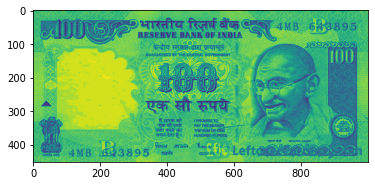

In [14]:
# Combining 4 bit planes
new_img = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img
# Display the images
plt.imshow(new_img) 
plt.show()